# Problem 1

In [93]:
import numpy as np

def fft(x):
    n = x.size
    assert n & (n - 1) == 0, "size of vector should be power of 2"
    w = np.fromfunction(lambda k: np.exp(-2 * np.pi * 1j * k / n), [n >> 1])
    
    def fft(i, n, s):
        if n == 1:
            return x[i]
        n >>= 1
        left = fft(i, n, s << 1)
        right = fft(i + s, n, s << 1)
        right *= np.fromfunction(lambda k: w[k * s], [n], dtype = np.int)
        return np.append(left + right, left - right)
    
    
    return fft(0, n, 1)

np_fft slope 1.06788842141 intercept -18.441232435 

my_fft slope 1.01457578413 intercept -10.4493824838 



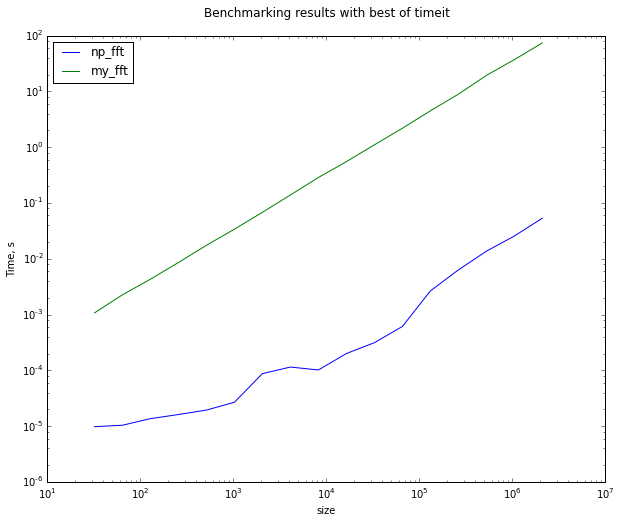

In [102]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

def plot_results(sizes, all_values):
    plt.figure(figsize=(10,8))
    
    for bench_name, values in all_values.iteritems():
        plt.loglog(sizes, values, label=bench_name)
        slope, intercept=np.polyfit(np.log(sizes[-5:]), np.log(values[-5:]), 1)
        print bench_name, 'slope', slope, 'intercept', intercept, '\n' 
    
    plt.legend(loc='best')
    plt.title('Benchmarking results with best of timeit', y=1.03)
    plt.xlabel('size')
    plt.ylabel('Time, s')
    
# points = [1 << (i + 5) for i in range(17)]
# my_fft = []
# np_fft = []

# for i in points:
#     x = np.random.rand(i)
#     res = %timeit -o np.fft.fft(x)
#     np_fft.append(res.best)
#     res = %timeit -o fft(x)
#     my_fft.append(res.best)
    
plot_results(points, {'my_fft': my_fft, 'np_fft': np_fft})

# Problem 2